# EDA - Exploratory Data Analysis

### Dataset : 
1. Loan Approval Classification Dataset : https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

### Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


#### 1. Checking Column Types & Missing Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Dapat kita lihat pada saat pengecekan tipe colom jumlah dari data pada setiap kolom nya bernilai sama yaitu 45000. Hal ini menandakan bahwa tidak terdapat missing value pada data yang kita gunakan

Sebagai Pengingat beberapa cara untuk mengatasi missing value :

1. Melakukan Konfirmasi kepada penyedia data
2. Drop the Column (Jika Missing value >50-60%)
3. Remove the Rows (Jika Missing value <50%)
4. Mengisi dengan Mean/Median dan Modus
    - mean, jika kolom tidak memiliki outlier
    - median, jika kita tidak bisa meyakinkan bahwa kolom tersebut tidak memiliki outlier

#### 2. Check Duplicates

In [7]:
df.duplicated().sum()

0

#### 3. Check Different Formats

In [9]:
for col in ['person_gender', 'person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']:
    print(f"Unik dari {col}:", df[col].unique())

Unik dari person_gender: ['female' 'male']
Unik dari person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Unik dari person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unik dari loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Unik dari previous_loan_defaults_on_file: ['No' 'Yes']


#### 4. Feature Engineering

Beberapa teknik dasar feature engineering di antaranya:

- Encoding
- Binning
- Normalization

#### - Encoding

##### a. Label Encoding

In [11]:
from sklearn import preprocessing
# Ambil kolom-kolom kategorikal
cate_cols = df.select_dtypes(include=['object']).columns
# Ambil fungsi LabelEncoder ke variabel 'le'
le = preprocessing.LabelEncoder()
# copy dataframe ke variabel baru
df_label_encode = df.copy()

# Encode label kategorikal menggunakan Label Encoder
for col in cate_cols:
    df_label_encode[col] = le.fit_transform(df_label_encode[col].astype(str))

df_label_encode

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [13]:
df_label_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int32  
 2   person_education                45000 non-null  int32  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  int32  
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  int32  
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

##### b. One-Hot Encoding

In [15]:
df_one_hot = pd.get_dummies(df, dtype=int)
df_one_hot

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_female,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,1,...,0,1,0,0,0,0,1,0,1,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,1,...,1,0,0,1,0,0,0,0,0,1
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,1,...,0,0,0,0,0,1,0,0,1,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,1,...,0,1,0,0,0,1,0,0,1,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1,0,...,0,1,0,0,0,1,0,0,1,0
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1,1,...,0,1,0,0,1,0,0,0,1,0
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1,0,...,0,1,1,0,0,0,0,0,1,0
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1,0,...,0,1,0,1,0,0,0,0,1,0


In [17]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   person_age                          45000 non-null  float64
 1   person_income                       45000 non-null  float64
 2   person_emp_exp                      45000 non-null  int64  
 3   loan_amnt                           45000 non-null  float64
 4   loan_int_rate                       45000 non-null  float64
 5   loan_percent_income                 45000 non-null  float64
 6   cb_person_cred_hist_length          45000 non-null  float64
 7   credit_score                        45000 non-null  int64  
 8   loan_status                         45000 non-null  int64  
 9   person_gender_female                45000 non-null  int32  
 10  person_gender_male                  45000 non-null  int32  
 11  person_education_Associate          45000

### Visualisasi Data

#### Melihat Persebaran Data menggunakan Histogram

Text(0.5, 0, 'Pinjaman')

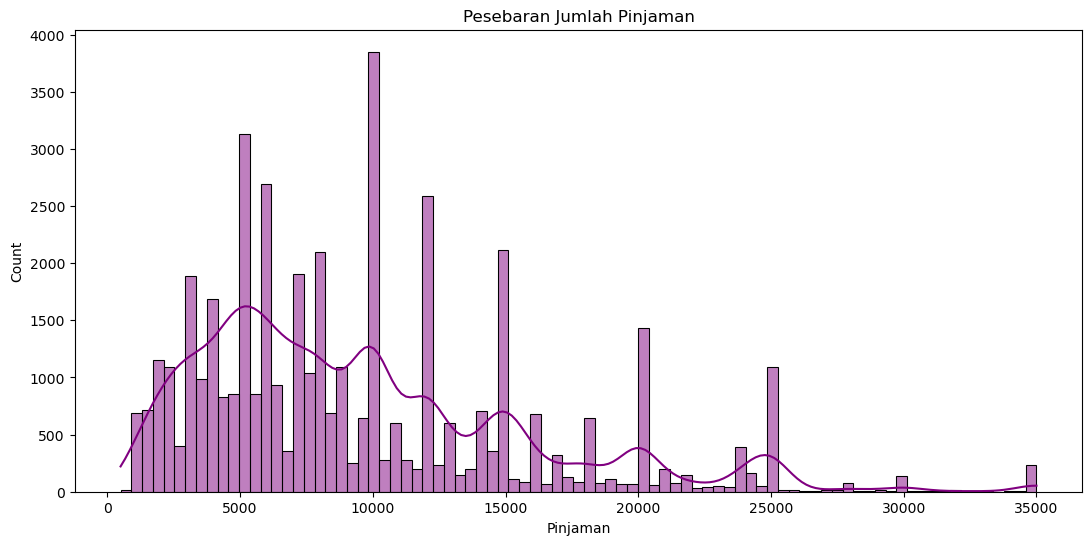

In [19]:
fig = plt.figure(figsize=(13, 6))
ax = sns.histplot(x=df['loan_amnt'], kde=True, color='purple')

plt.title("Pesebaran Jumlah Pinjaman")
plt.xlabel("Pinjaman")

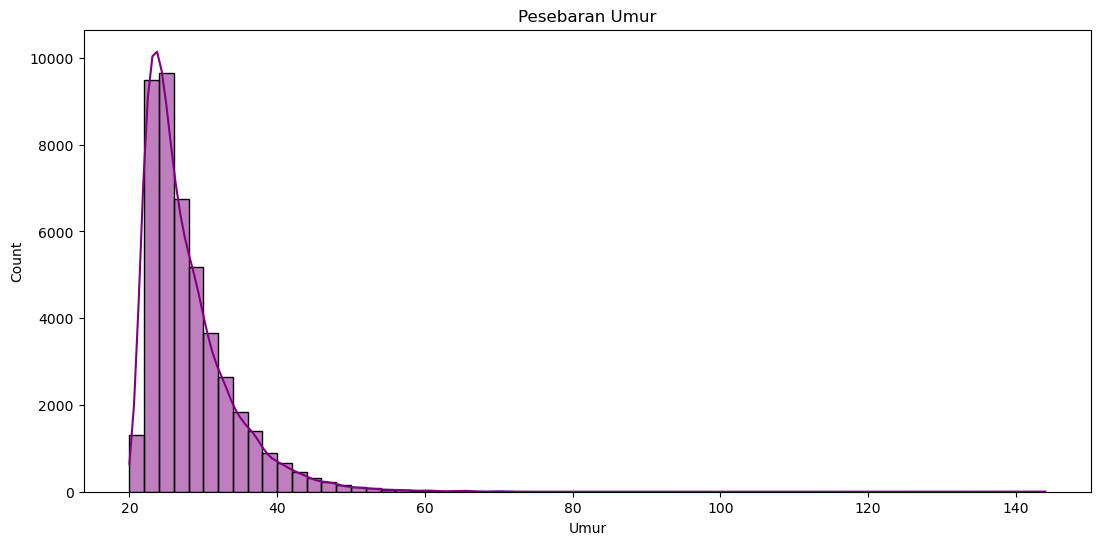

In [21]:
fig = plt.figure(figsize=(13, 6))
ax = sns.histplot(x=df['person_age'], kde=True, color='purple', binwidth = 2)

plt.title("Pesebaran Umur")
plt.xlabel("Umur")
plt.show()

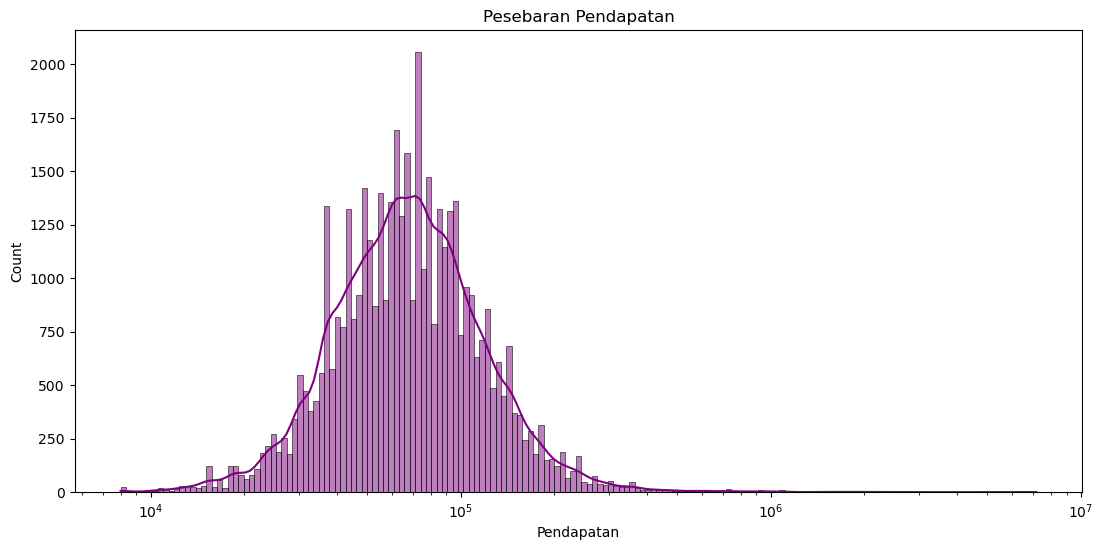

In [23]:
fig = plt.figure(figsize=(13, 6))
ax = sns.histplot(x=df['person_income'], kde=True, color='purple', log_scale=True )

plt.title("Pesebaran Pendapatan")
plt.xlabel("Pendapatan")
plt.show()

#### Melihat persebaran data dan pengecekan outlier menggunakan box plot

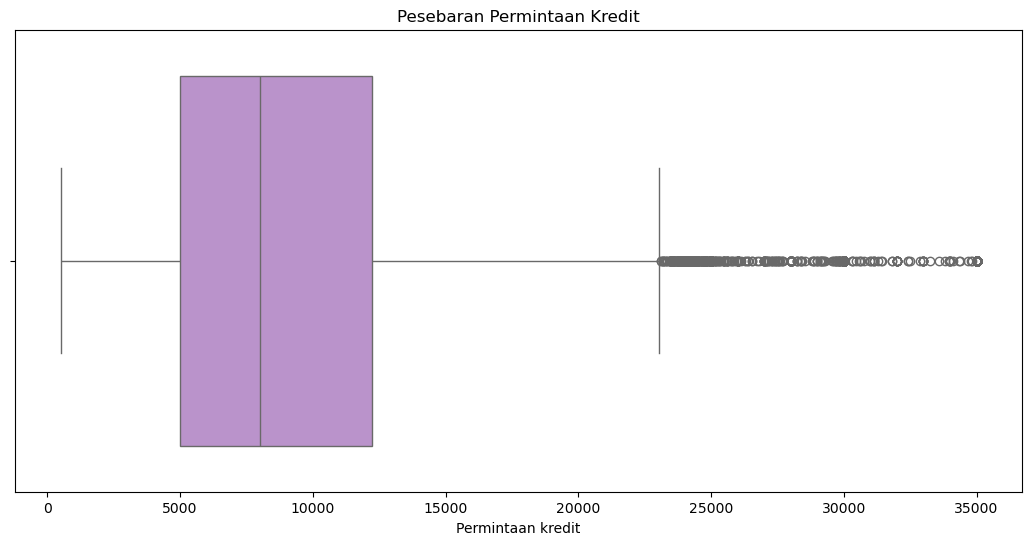

In [25]:
fig = plt.figure(figsize=(13, 6))
ax = sns.boxplot(x='loan_amnt', data=df, color='#bd8ad4')

plt.title("Pesebaran Permintaan Kredit")
plt.xlabel("Permintaan kredit")

plt.show()

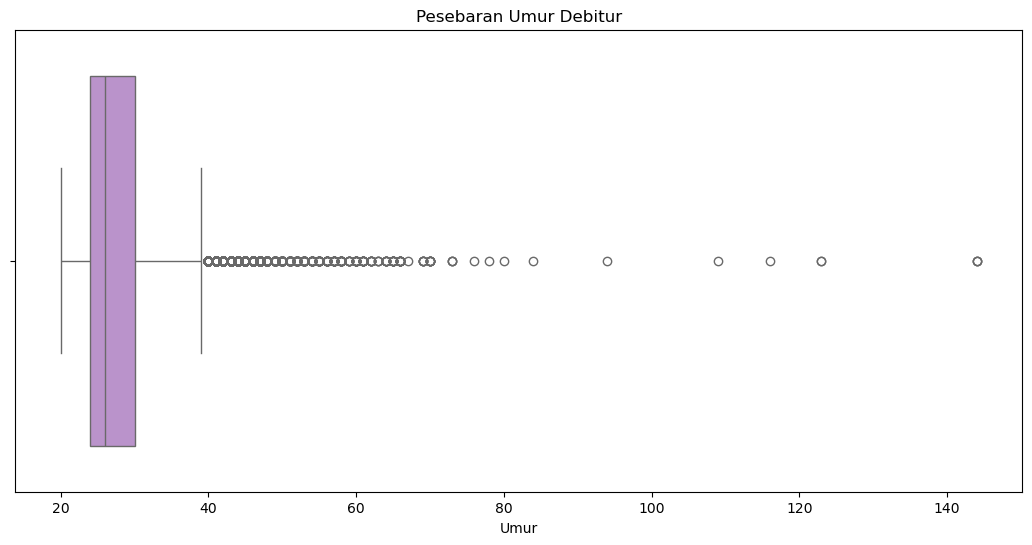

In [27]:
fig = plt.figure(figsize=(13, 6))
ax = sns.boxplot(x='person_age', data=df, color='#bd8ad4')

plt.title("Pesebaran Umur Debitur")
plt.xlabel("Umur")

plt.show()

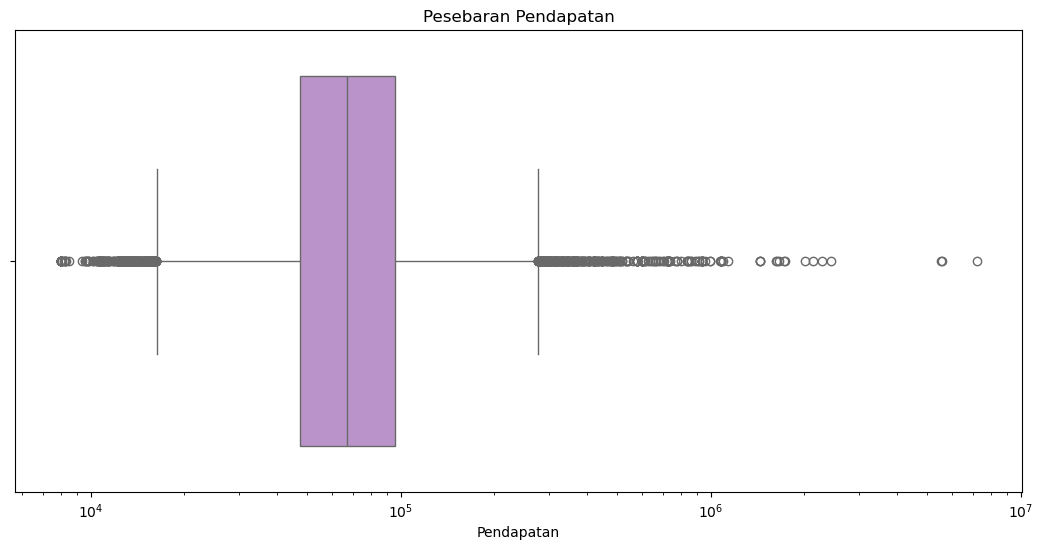

In [29]:
fig = plt.figure(figsize=(13, 6))
ax = sns.boxplot(x='person_income', data=df, color='#bd8ad4', log_scale=True)

plt.title("Pesebaran Pendapatan")
plt.xlabel("Pendapatan")

plt.show()

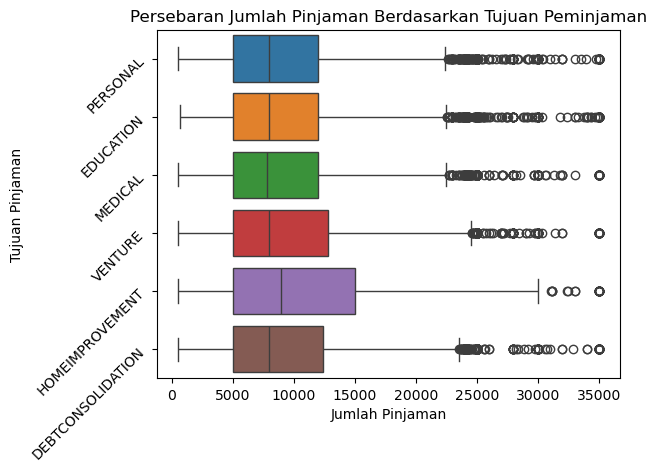

In [31]:
fig = plt.figure()
ax = sns.boxplot(y='loan_intent', x='loan_amnt', data=df, hue='loan_intent')
plt.yticks(rotation=45)
plt.title("Persebaran Jumlah Pinjaman Berdasarkan Tujuan Peminjaman")
plt.xlabel("Jumlah Pinjaman")
plt.ylabel("Tujuan Pinjaman")
plt.tight_layout()
plt.show()


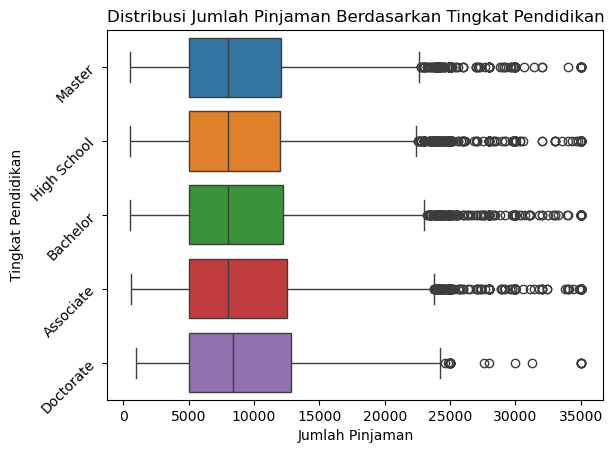

In [33]:
fig = plt.figure()
ax = sns.boxplot(y = 'person_education', x = 'loan_amnt', data = df, hue='person_education')
plt.yticks(rotation=45)
plt.title("Distribusi Jumlah Pinjaman Berdasarkan Tingkat Pendidikan")
plt.xlabel("Jumlah Pinjaman")
plt.ylabel("Tingkat Pendidikan")
plt.show()

#### Melihat Distribusi Data menggunakan Countplot

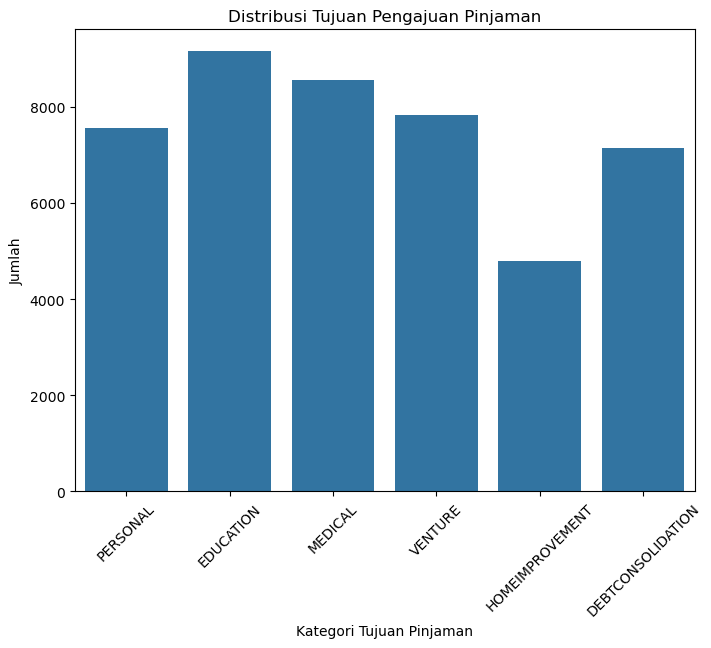

In [35]:
fig = plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['loan_intent'])

plt.title("Distribusi Tujuan Pengajuan Pinjaman")
plt.xlabel("Kategori Tujuan Pinjaman")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

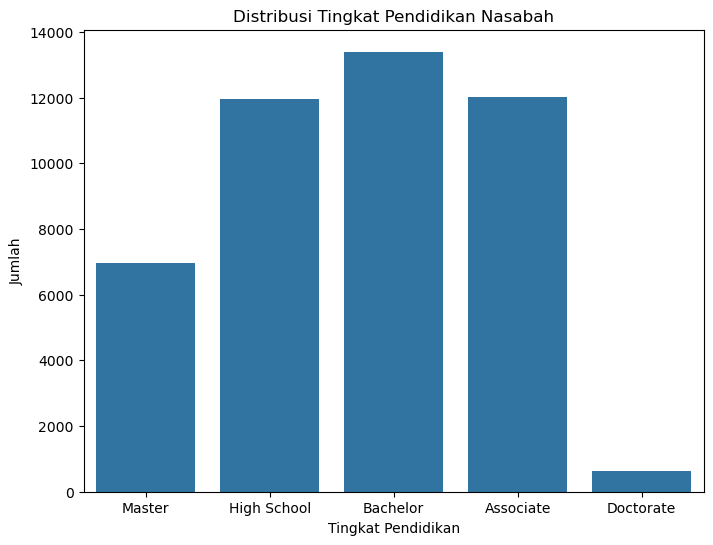

In [37]:
fig = plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['person_education'])

plt.title("Distribusi Tingkat Pendidikan Nasabah")
plt.xlabel("Tingkat Pendidikan")
plt.ylabel("Jumlah")
plt.show()

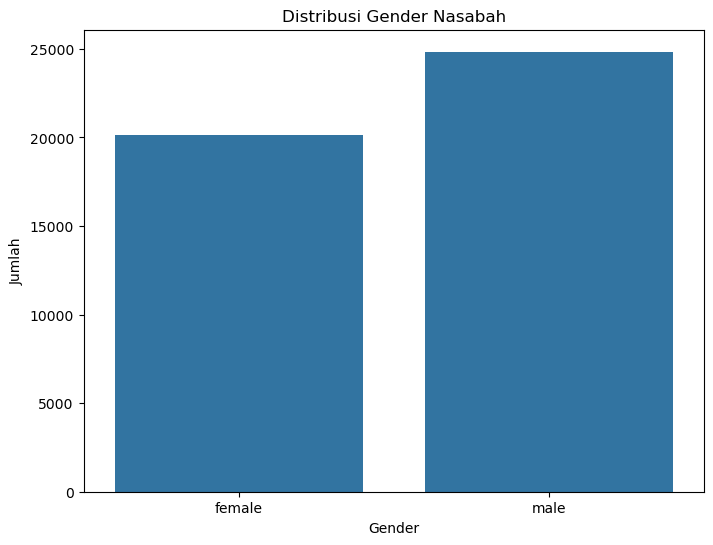

In [39]:
fig = plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['person_gender'])

plt.title("Distribusi Gender Nasabah")
plt.xlabel("Gender")
plt.ylabel("Jumlah")
plt.show()

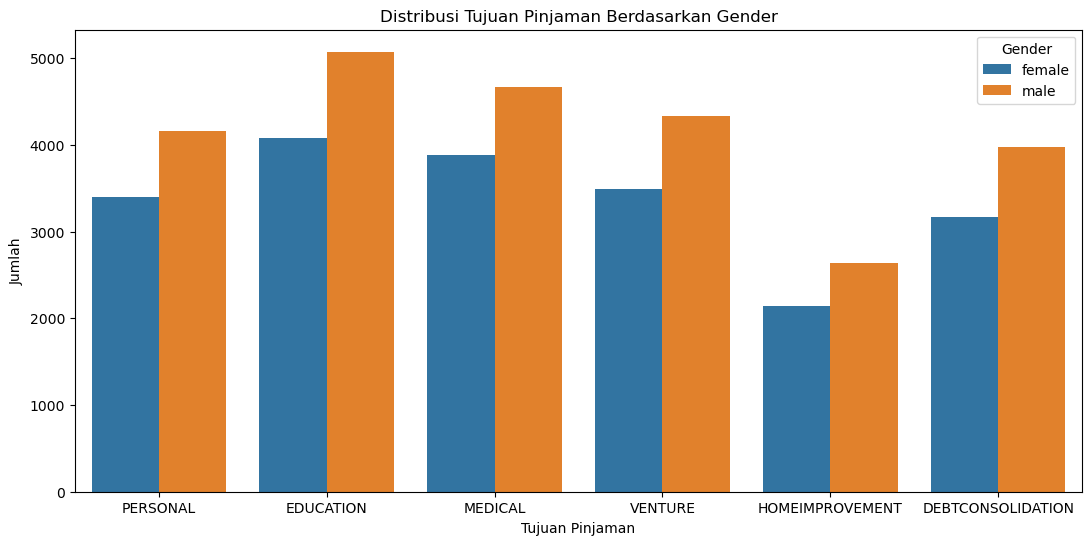

In [41]:
fig = plt.figure(figsize=(13, 6))  
ax = sns.countplot(data = df, x='loan_intent', hue = 'person_gender')
plt.title("Distribusi Tujuan Pinjaman Berdasarkan Gender")
plt.xlabel("Tujuan Pinjaman")
plt.ylabel("Jumlah")
plt.legend(title='Gender')
plt.show() 

#### Analisis Korelasi Antar Variabel Numerik

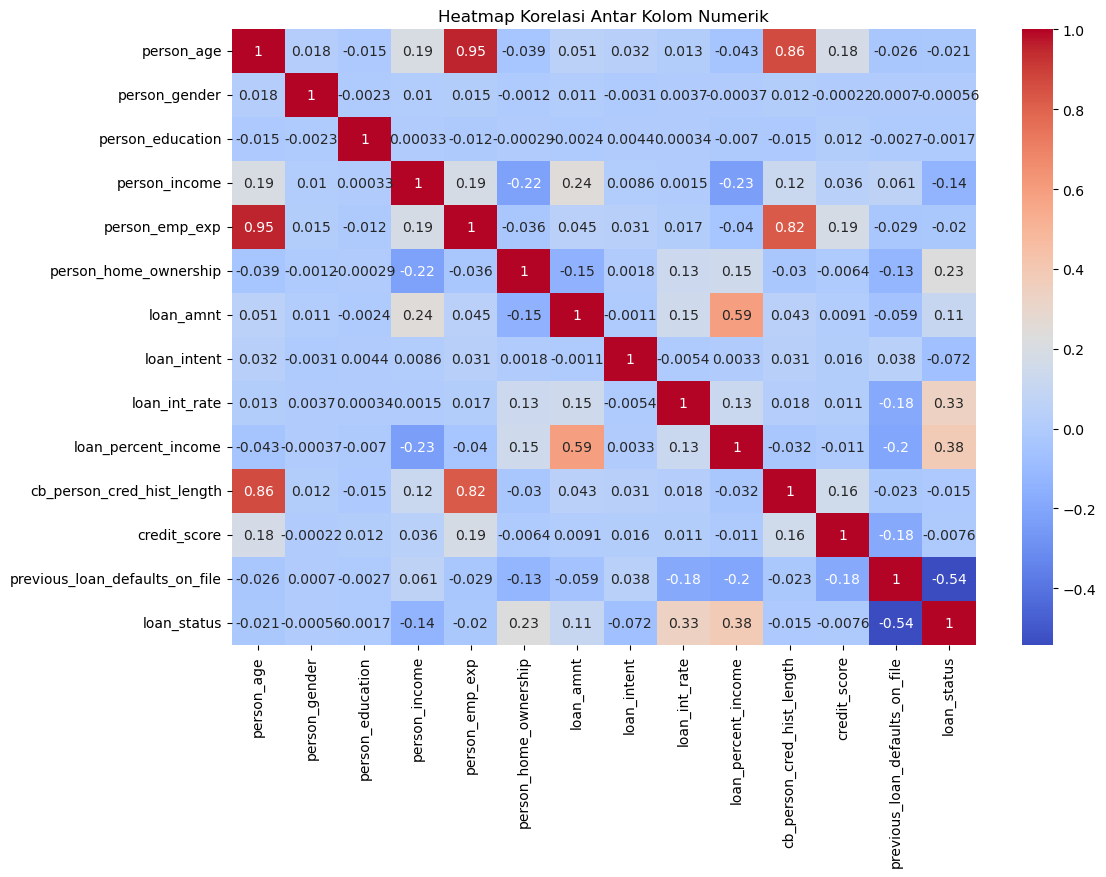

In [43]:
numeric_df = df_label_encode.select_dtypes(include='number')

plt.figure(figsize=(12, 8)) 
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Kolom Numerik")
plt.show()

#### Melihat Hubungan Antara 2 Kolom Dengan Scatterplot

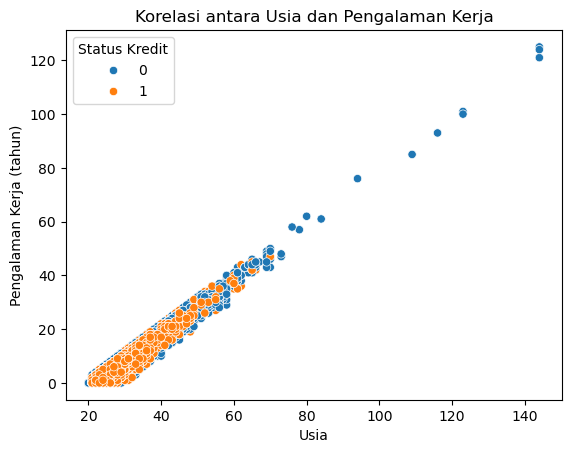

In [45]:
sns.scatterplot(x=df['person_age'], y=df['person_emp_exp'], data=df, color='purple', hue = 'loan_status')
plt.title("Korelasi antara Usia dan Pengalaman Kerja")
plt.xlabel("Usia")
plt.ylabel("Pengalaman Kerja (tahun)")
plt.legend(title='Status Kredit')
plt.show()

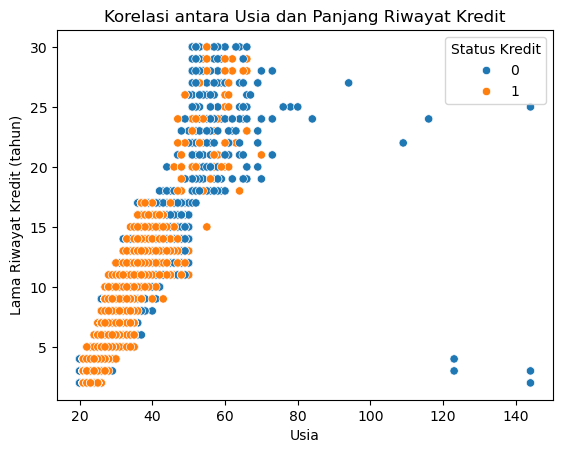

In [47]:
sns.scatterplot(x = df['person_age'], y = df["cb_person_cred_hist_length"], data = df, color = 'purple',hue = 'loan_status')
plt.title("Korelasi antara Usia dan Panjang Riwayat Kredit")
plt.xlabel("Usia")
plt.ylabel("Lama Riwayat Kredit (tahun)")
plt.legend(title='Status Kredit')
plt.show()

In [49]:
df_label_encode.to_csv(r"C:\Users\Acer\Praktikum Data Science\Pertemuan 7\loan_clean.csv", index=False)